In [2]:
import os
import pandas as pd
import numpy as np
# ingore future warning
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
# surprass chain warning
pd.set_option('mode.chained_assignment', None)
#warnings.filterwarnings("ignore", message=r"Passing", category=SettingWithCopyWarning)

print("Set the printing size of the pandas df... ")
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Set the printing size of the pandas df... 


### Read in Kinematic Dataset

In [3]:
""" 
func: 
    transform the string format 
args: 
    s: str 
return: 
    s: str
"""
def tide_str(s, cut=False): 
    s = s.replace('_', '-')
    s = s.lower()
    s = s.replace('2021', '21')
    return s

# to transform the string format
s = '1_18_2021_Leona_CLIP1' 
print("test: ", tide_str(s, cut=True))
s = '2_9_2021_Robin_CLIP2' 
print("test: ", tide_str(s, cut=True))

test:  1-18-21-leona-clip1
test:  2-9-21-robin-clip2


In [4]:
# get the path
path = os.getcwd()
files = os.listdir(path + '/excel')

# filter excel
files_xlsx = [f for f in files if f[-4:] == 'xlsx']


In [5]:
# files_xlsx

def clean_idx(test):
    idx = test.index('clip')
    return test[:idx+5]

# process the name to make them corresponding
excel_ls = [] 
for name in files_xlsx: 
    """apply func"""
    new = clean_idx(name.lower()) 
    new = new.replace("_", "-")
    # append
    excel_ls.append(new)
    


In [6]:
print("read in back variable: ")
back_var = pd.read_csv("back_wave_variable.csv")

back_var['NAME'] = excel_ls

print("now back_var is created")

read in back variable: 
now back_var is created


### Read in video gait variables as df_var

In [7]:
df_var = pd.read_excel("kinematic_variable.xlsx")
print("shape: ", df_var.shape)

shape:  (828, 10)


In [8]:
# get the sorted list of idx
idx_var = set(df_var.iloc[:, 0].tolist())
idx_var = sorted(list(idx_var))
print("length: ", len(idx_var))


length:  69


In [9]:
print("extract nrs from attribute df")
nrs_repete = df_var.iloc[:, -1].tolist()
# get unique idx from repete by taking every 12th element 
nrs_single = []
for i in range(0, len(nrs_repete), 12): 
    nrs_single.append(nrs_repete[i])
    
print("check: ", nrs_single)

extract nrs from attribute df
check:  [3.0, 2.5, 3.0, 2.0, 2.0, 2.5, 2.5, 2.5, 3.0, 2.5, 2.5, 2.5, 3.0, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.5, 2.0, 2.0, 2.5, 3.0, 2.0, 4.0, 2.0, 2.0, 2.5, 3.0, 3.0, 2.0, 2.0, 2.5, 2.5, 3.0, 3.0, 1.5, 2.0, 2.5, 4.0, 3.5, 2.0, 2.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.0, 2.0, 2.0, 2.0, 2.0, 3.5, 3.0, 2.5, 2.5, 2.5, 2.0, 3.5, 3.0, 3.0, 3.5]


### Read in visual gait attribute score as df_score

In [10]:
df_score = pd.read_excel("gait_score.xlsx")
print("shape: ", df_score.shape)
df_score.head()

shape:  (69, 8)


,Passage Name,swing,back,track,flex,asymm,reluctance to bear weight,NRS
0,1_18_2021_Leona_CLIP1,1.5,1.5,0.5,2.0,1.0,2.0,3.0
1,1_19_2021_Honey_CLIP1,1.5,0.5,0.5,2.5,1.5,2.0,3.0
2,1_19_2021_Leona_CLIP1,1.0,1.0,1.0,2.5,0.0,0.5,2.0
3,1_20_2021_Beyonce_CLIP1,0.5,0.5,2.5,2.0,2.0,1.0,2.5
4,1_20_2021_Honey_CLIP1,1.5,2.0,0.0,3.0,1.0,0.5,2.5


In [11]:
# get the list of idx
idx_score = df_score.iloc[:, 0].tolist()
print("length: ", len(idx_score))


length:  69


### -----------------------------------------------------------------------------------
### Attribute 1: Swing out (later extract from kinematic dataset)
### Attribute 2: Arch back (later extract from kinematic dataset)
### Attribute 3: Track up (use celia's data)
### Attribute 4: Joint reflex (use celia's data)
### Attribute 5: Asymmetric step (use stride length)
### Attribute 6: Weight bearing (use stride time)
### -----------------------------------------------------------------------------------

In [12]:
""" 
func: 
    unify_name_get_score
args: 
    df_var: panda df
    df_score: panda df
    idx_score: list[str] 
    NAME: str name of column of the score
return: 
    idx_single_: list[str] 
    idx_score_: list[str] 
    var_score: list[float] score column by NAME
"""
def unify_name_get_score(df_var, df_score, idx_score, NAME):    
    print("\n 1, get unique idx from repete by taking every 12th element --> idx_single")
    idx_repete = df_var.iloc[:, 0].tolist()
    # get unique idx from repete by taking every 12th element 
    idx_single = []
    for i in range(0, len(idx_repete), 12): 
        idx_single.append(idx_repete[i])
    # check length of idx_single 
    print("length :", len(idx_single))

    print("\n 2. processing names of idx_single, cut string after clip(int) --> idx_single_")
    """args: str, return: str"""
    def clean_idx(test):
        idx = test.index('clip')
        return test[:idx+5]
    test = '1-18-21-leona-clip2-copy'
    result = clean_idx(test)
    print("test: ", result)
    """using func"""
    idx_single_ = [clean_idx(test) for test in idx_single]
    print("len: ", len(idx_single_))

    print("\n 3. process name of idx_score")
    """using func: """
    idx_score_ = [tide_str(s) for s in idx_score]
    print("length: ", len(idx_score_))
    print("check if we got all the names right")
    print(sorted(idx_score_) == sorted(idx_single_))

    print("\n 4. get the corresponding scores by cleaned name")
    # append the list of unsorted name to df
    df_score["Clean_Name"] = idx_score_
    # now get the track score by name 
    var_score = []
    # loop idx single and obtain score by sequence 
    for idx in range(len(idx_single_)): 
        var_score.append(df_score[df_score['Clean_Name'] == idx_single_[idx]][NAME].tolist()[0])
    print("get: ", NAME, '_score')
    
    return idx_single, idx_single_, idx_score_, var_score

# Import and define classification models

### Do a strafied spliting with minimum class of 5 to allow in the testing group

In [13]:
""" 
func: 
    find the common index and return the test index
args: 
    ls_ls: list[list[int]]
    test_ratio = 0.3
return: 
    test_idx: list[int]
"""
from collections import Counter
def common_index(ls_ls, test_ratio = 0.3):

    # set the complete index 
    common = [i for i in range(len(ls_ls[0]))]
    print("check length: ", len(common))
    
    for y in ls_ls: 

        # get the count
        count = Counter(y)

        # get count that exceed min eamples
        MIN = 6
        key_ls = [key for (key, value) in count.items() if value >= MIN]

        # get the index of these counts 
        index_ls = []
        for i in range(len(y)): 
            if y[i] in key_ls: 
                index_ls.append(i)
        
        # find common by set 
        common = list(set(common) & set(index_ls))
        print("check length: ", len(common))
        
    # pick testing index
    print("common index: ", common)
    np.random.seed(2024)
    np.random.shuffle(common)
    length = len(common)
    
    test_idx = common[:int(length*test_ratio)]
    list1, list2 = [i for i in range(len(ls_ls[0]))], test_idx
    train_idx = list(set(list1) - set(list2))
    
    return train_idx, test_idx

In [14]:
"""func: """
NAME = 'swing'
idx_single, idx_single_, idx_score_, var_score = unify_name_get_score(df_var, df_score, idx_score, NAME)
swing_score = var_score

NAME = 'back'
idx_single, idx_single_, idx_score_, var_score = unify_name_get_score(df_var, df_score, idx_score, NAME)
back_score = var_score

NAME = 'track'
idx_single, idx_single_, idx_score_, var_score = unify_name_get_score(df_var, df_score, idx_score, NAME)
track_score = var_score

NAME = 'flex'
idx_single, idx_single_, idx_score_, var_score = unify_name_get_score(df_var, df_score, idx_score, NAME)
flex_score = var_score

NAME = 'asymm'
idx_single, idx_single_, idx_score_, var_score = unify_name_get_score(df_var, df_score, idx_score, NAME)
asymm_score = var_score

NAME = 'reluctance to bear weight'
idx_single, idx_single_, idx_score_, var_score = unify_name_get_score(df_var, df_score, idx_score, NAME)
weight_score = var_score

ls_ls = [swing_score, back_score, track_score, flex_score, asymm_score, weight_score]

"""using func: """
train_idx, test_idx = common_index(ls_ls)


 1, get unique idx from repete by taking every 12th element --> idx_single
length : 69

 2. processing names of idx_single, cut string after clip(int) --> idx_single_
test:  1-18-21-leona-clip2
len:  69

 3. process name of idx_score
length:  69
check if we got all the names right
True

 4. get the corresponding scores by cleaned name
get:  swing _score

 1, get unique idx from repete by taking every 12th element --> idx_single
length : 69

 2. processing names of idx_single, cut string after clip(int) --> idx_single_
test:  1-18-21-leona-clip2
len:  69

 3. process name of idx_score
length:  69
check if we got all the names right
True

 4. get the corresponding scores by cleaned name
get:  back _score

 1, get unique idx from repete by taking every 12th element --> idx_single
length : 69

 2. processing names of idx_single, cut string after clip(int) --> idx_single_
test:  1-18-21-leona-clip2
len:  69

 3. process name of idx_score
length:  69
check if we got all the names right
True

### Training and testing function from sklearn

In [15]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
 

def loo_best_model(X_train, y_train, X_test, models):
    loo = LeaveOneOut()
    best_score = -np.inf
    best_model = None

    # Evaluate each model using LOO cross-validation
    for model in models:
        scores = []
        for train_idx, val_idx in loo.split(X_train):
            X_train_part = X_train[train_idx]
            y_train_part = y_train[train_idx]
            X_val = X_train[val_idx]
            y_val = y_train[val_idx]

            model.fit(X_train_part, y_train_part)
            y_pred = model.predict(X_val)
            """using func: """
            acc, pre, rec, f1 = evaluate(y_val, y_pred)
            scores.append(f1)

        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_model = model
            
    # Train the best model on the entire training dataset
    best_model.fit(X_train, y_train)
    # Make predictions on the test dataset
    y_pred = best_model.predict(X_test)
    
    return y_pred

""" 
func: 
args: 
    y_test, y_pred: list[int]
return: 
    pre, rec, f1: float
"""
def evaluate(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)

    pre = precision_score(y_test, y_pred, average='weighted')

    rec = recall_score(y_test, y_pred, average='weighted')

    f1 = f1_score(y_test, y_pred, average='weighted')
    
    #print("ACC, Precision, Recall, F1-Score: ", acc, pre, rec, f1)
    return acc, pre, rec, f1
 
def stratify_split(X, y, train_idx, test_idx): 
    print("a starified train/test spliting")
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

def split_train_evaluate(X, y, train_idx, test_idx):

    # init result to store performance
    result = []
    # init best model, later judge by f1
    best_model, best_f1 = 0, 0
    
    # splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = stratify_split(X, y, train_idx, test_idx)

    # a list of models 
    models = [SGDClassifier(max_iter=1000, tol=1e-3), GaussianNB(), DecisionTreeClassifier(random_state=0), svm.SVC(kernel='linear')]

    """using func: wiht loo"""
    y_pred = loo_best_model(X_train, y_train, X_test, models)
    
    """using func: """
    acc, pre, rec, f1 = evaluate(y_test, y_pred)
    print("acc, pre, rec, f1: ", acc, pre, rec, f1)
    # back-transform label to score 
    test_score = [i/2 for i in y_test]
    pred_score = [i/2 for i in y_pred]
    LABEL = sorted(list(set(test_score)))
    # compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels = sorted(list(set(y_test))))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = LABEL)
    disp.plot()
    plt.show()
    
    return result, best_model, best_f1, y_pred, y_test

In [16]:
""" 
func: 
    scatter plot with diff labels 
args: 
    X: np 
    y_score: list[float]  original score
    variable_name: list[str]
reutrn: 
    plot
"""
import seaborn as sns
def scatter_label(X, y_score, variable_name):    

    plot_df = pd.DataFrame(data=X, columns=variable_name)
    plot_df['label'] = y_score

    # create a scatter plot with two variables (sepal length and petal length)
    # use different markers for different classes/species
    MARKER = ['o', 'o', 'o', '^', '^', '^',  's', 's', 's']
    COLOR = ['yellowgreen', 'lightgreen', 'forestgreen', 'limegreen',  'navy', 'slateblue', 'blueviolet', 'indigo', 'rebeccapurple', 'purple', 'midnightblue']
    
    sns.lmplot(data=plot_df, x=variable_name[0], y=variable_name[1], 
               hue='label', fit_reg=False, markers=MARKER[:len(set(y))], palette=COLOR[:len(set(y))])

    # set plot labels and title
    plt.xlabel(variable_name[0])
    plt.ylabel(variable_name[1])
    plt.title('Classification based on two variables')

    # show the plot
    plt.show()

In [17]:
print("init list to store all X, y, y_pred, y_test")
X_all, y_all, y_pred_all, y_test_all = 6*[0], 6*[0], 6*[0], 6*[0]
print("init as: ", X_all)

init list to store all X, y, y_pred, y_test
init as:  [0, 0, 0, 0, 0, 0]


# Attribute 1: Swing

In [18]:

""" 
func: 
    get the variable track up from df 
args: 
    df: panda data 
    method: (string) how we compress the data 
    idx_single: list[string] list of data point name
return: 
    var_ls_ls: list[list[float]]
"""
import numpy as np
def swing_variable(df_var, method, idx_single):
    
    # make all positive 
    df_var['track-up-disX'] = df_var['track-up-disX'].abs()
    
    # loop the data by name 
    var_ls_ls = []
    for name in idx_single:
        # print("name: ", name)
        # extract from df
        disX = df_var.loc[df_var['ID'] == name]['track-up-disX']
        
        # transform the list into variables
        if method == 'mean': 
            # get the mean out of three steps 
            # here the index because we want to bypass the nan value
            left_x = np.nanmean(disX.tolist()[:3])
            right_x = np.nanmean(disX.tolist()[6:9])
            var_ls = [left_x + right_x, abs(left_x - right_x)]
        elif method == 'max': 
            # here the index because we want to bypass the nan value
            left_x = max(disX.tolist()[:3])
            right_x = max(disX.tolist()[6:9])
            var_ls = [left_x + right_x, abs(left_x - right_x)]
        else: 
            print("method not found")

        # make all positive and round up
        var_ls = [abs(round(i, 4)) for i in var_ls]
        # print("var_ls: ", var_ls)
        # append 
        var_ls_ls.append(var_ls) 
    print("length: ", len(var_ls_ls))
    return var_ls_ls

print("fill in nan with column mean")
""" 
func: 
    fill in nan with column mean: 
args: 
    a: np 
return: 
    a: np
"""
def col_fill(a): 
    # obtian mean/median
    col_mean = np.nanmedian(a, axis=0)
    # find indices that you need to replace
    inds = np.where(np.isnan(a))
    # place column means in the indices. Align the arrays using take
    a[inds] = np.take(col_mean, inds[1])
    return a


fill in nan with column mean


In [19]:
print("extract variable: ")
# set the method 
method = 'mean'
"""func: """
var_ls_ls = swing_variable(df_var, method, idx_single)

print("there is nan that we need to fill up by column mean")
"""func: """
X_np = col_fill(np.array(var_ls_ls))
print("get shape: ", X_np.shape)

extract variable: 
length:  69
there is nan that we need to fill up by column mean
get shape:  (69, 2)


train and test model
a starified train/test spliting
acc, pre, rec, f1:  0.18181818181818182 0.22727272727272727 0.18181818181818182 0.20202020202020202


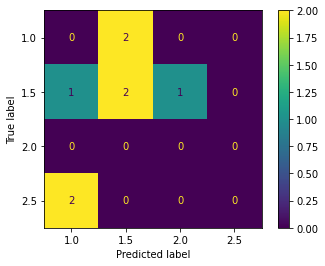

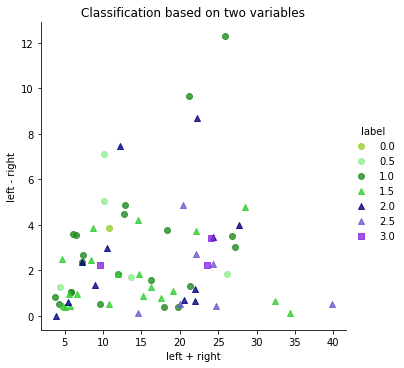

In [20]:
print("train and test model")
# label tranform
y_score = swing_score
y_label = [int(i*2) for i in y_score]
"""using func: """
X, y = X_np, np.array(y_label)
result, best_model, best_f1, y_pred, y_test = split_train_evaluate(X, y, train_idx, test_idx)
# append 
idx = 0
X_all[idx], y_all[idx], y_pred_all[idx], y_test_all[idx] = X, y, y_pred, y_test

"""using func: """
variable_name = ['left + right', 'left - right']
scatter_label(X, y_score, variable_name)

# Attribute 2: Back-arch

In [20]:

""" 
func: 
    get the variable track up from df 
args: 
    df: panda data 
    method: (string) how we compress the data 
    idx_single: list[string] list of data point name
return: 
    var_ls_ls: list[list[float]]
"""
import numpy as np
def back_variable(df_var, idx_single_):

    # loop the data by name 
    var_ls_ls = []
    for name in idx_single_:
        # print("name: ", name)
        # extract from df
        var_ls = df_var.loc[df_var['NAME'] == name]
        var_ls = var_ls.iloc[0, :3].tolist()
        # print("var_ls: ", var_ls)
        # append 
        var_ls_ls.append(var_ls) 
    print("length: ", len(var_ls_ls))
    return var_ls_ls


In [21]:
"""using func: """
var_ls_ls = back_variable(back_var, idx_single_)
X_np = np.array(var_ls_ls)

length:  69


train and test model
a starified train/test spliting
acc, pre, rec, f1:  0.45454545454545453 0.5757575757575757 0.45454545454545453 0.45454545454545453


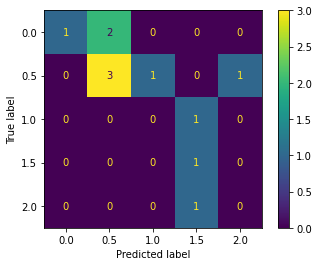

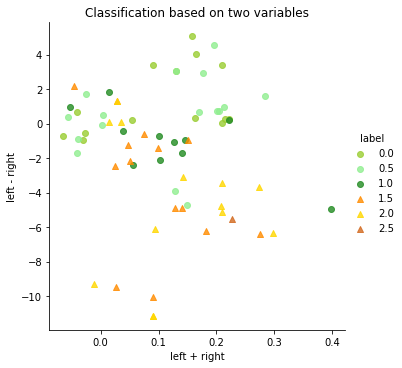

In [22]:
print("train and test model")
# label tranform
y_score = back_score
y_label = [int(i*2) for i in y_score]
"""using func: """
X, y = X_np, np.array(y_label)
result, best_model, best_f1, y_pred, y_test = split_train_evaluate(X, y, train_idx, test_idx)
# append 
idx = 1
X_all[idx], y_all[idx], y_pred_all[idx], y_test_all[idx] = X, y, y_pred, y_test

"""using func: """
variable_name = ['left + right', 'left - right']
scatter_label(X[:, :2], y_score, variable_name)

# Attribute 3: Track up (use celia's data) from df_var

In [23]:

""" 
func: 
    get the variable track up from df 
args: 
    df: panda data 
    method: (string) how we compress the data 
    idx_single: list[string] list of data point name
return: 
    var_ls_ls: list[list[float]]
"""
import numpy as np
def track_up_variable(df_var, method, idx_single):
    
    # make all positive 
    df_var['track-up-disXY'] = df_var['track-up-disXY'].abs()
    df_var['track-up-disX'] = df_var['track-up-disX'].abs()
    
    # loop the data by name 
    var_ls_ls = []
    for name in idx_single:
        # print("name: ", name)
        # extract from df
        disXY = df_var.loc[df_var['ID'] == name]['track-up-disXY']
        disX = df_var.loc[df_var['ID'] == name]['track-up-disX']

        # get the mean out of three steps 
        # here the index because we want to bypass the nan value
        left_xy = np.nanmean(disXY.tolist()[:3])
        right_xy = np.nanmean(disXY.tolist()[6:9])
        left_x = np.nanmean(disX.tolist()[:3])
        right_x = np.nanmean(disX.tolist()[6:9])
        
        # transform the list into variables
        if method == 'mean': 
            var_ls = [np.mean(left_xy, right_xy), np.mean(left_x, right_x)]
        elif method == 'max': 
            var_ls = [max(left_xy, right_xy), max(left_x, right_x)]
        else: 
            print("method not found")

        # make all positive and round up
        var_ls = [abs(round(i, 4)) for i in var_ls]
        # print("var_ls: ", var_ls)
        # append 
        var_ls_ls.append(var_ls) 
    print("length: ", len(var_ls_ls))
    return var_ls_ls

print("fill in nan with column mean")
""" 
func: 
    fill in nan with column mean: 
args: 
    a: np 
return: 
    a: np
"""
def col_fill(a): 
    # obtian mean/median
    col_mean = np.nanmedian(a, axis=0)
    # find indices that you need to replace
    inds = np.where(np.isnan(a))
    # place column means in the indices. Align the arrays using take
    a[inds] = np.take(col_mean, inds[1])
    return a



fill in nan with column mean


In [24]:
print("extract track-up-disXY and track-up-disX (by the sequence of idx_single)")

# set the method 
method = 'max'
"""func: """
var_ls_ls = track_up_variable(df_var, method, idx_single)
print("there is nan that we need to fill up by column mean")

"""func: """
X_np = col_fill(np.array(var_ls_ls))
print("get var_np: ", X_np.shape)

extract track-up-disXY and track-up-disX (by the sequence of idx_single)
length:  69
there is nan that we need to fill up by column mean
get var_np:  (69, 2)


train and test model
a starified train/test spliting
acc, pre, rec, f1:  0.6363636363636364 0.5227272727272727 0.6363636363636364 0.5714285714285714


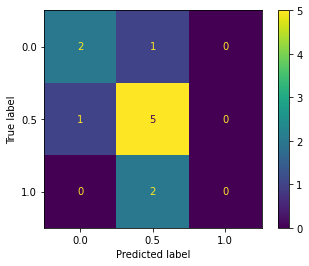

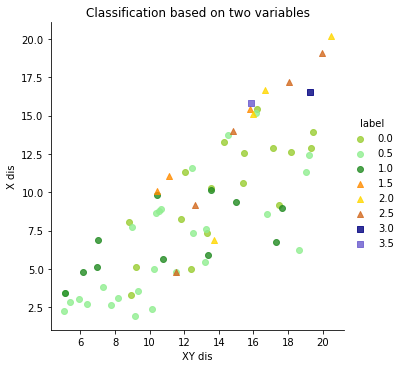

In [25]:
print("train and test model")
# label tranform
y_score = track_score
y_label = [int(i*2) for i in y_score]
"""using func: """
X, y = X_np, np.array(y_label)
result, best_model, best_f1, y_pred, y_test = split_train_evaluate(X, y, train_idx, test_idx)
# append 
idx = 2
X_all[idx], y_all[idx], y_pred_all[idx], y_test_all[idx] = X, y, y_pred, y_test

"""using func: """
variable_name = ['XY dis', 'X dis']
scatter_label(X, y_score, variable_name)

# Attribute 4: Joint reflex (use celia's data) from df_var

In [26]:
""" 
func: 
    get the variable track up from df 
args: 
    df: panda data 
    method: (string) how we compress the data 
    idx_single: list[string] list of data point name
return: 
    var_ls_ls: list[list[float]]
"""
import numpy as np
def flex_variable(df_var, idx_single):
    
    # loop the data by name 
    var_ls_ls = []
    for name in idx_single:
        # get col from df 
        angle = df_var.loc[df_var['ID'] == name]['average-angle'].tolist()
        # get only float 
        angle_f = [i for i in angle if i==i]
        # append 
        var_ls_ls.append(angle_f)
        
    return var_ls_ls

In [27]:
"""func: flex_variable"""
flex_ls_ls = flex_variable(df_var, idx_single)
X_np = np.array(flex_ls_ls)

train and test model
a starified train/test spliting
acc, pre, rec, f1:  0.2727272727272727 0.17575757575757575 0.2727272727272727 0.21363636363636365


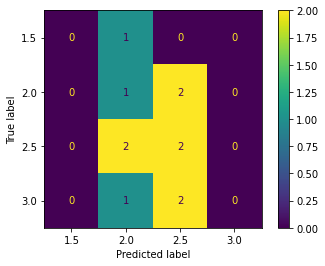

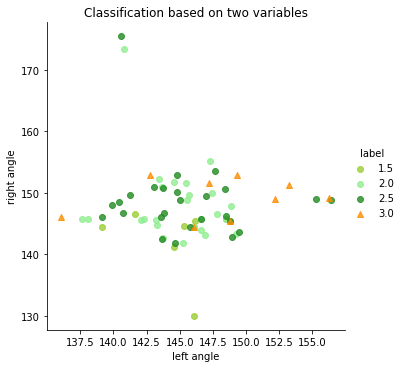

In [28]:
print("train and test model")
# label tranform
y_score = flex_score
y_label = [int(i*2) for i in y_score]
"""using func: """
X, y = X_np, np.array(y_label)
result, best_model, best_f1, y_pred, y_test = split_train_evaluate(X, y, train_idx, test_idx)
# append 
idx = 3
X_all[idx], y_all[idx], y_pred_all[idx], y_test_all[idx] = X, y, y_pred, y_test

"""using func: """
variable_name = ['left angle', 'right angle']
scatter_label(X, y_score, variable_name)

# Attribute 5: Asymmetric step (use stride length)

In [29]:
"""
func: 
    compute asymm index for 4 number
args: 
    ls_4: list[float]
return: 
    sum(result): float
"""
def asymm_index(ls_4):
    # compute average value
    x_ave = sum(ls_4)/4
    # init result list 
    result = [] 
    # loop thourgh the input list
    for i in ls_4: 
        # compute asymm index 
        asy_idx = abs(0.5*((i-x_ave)/(i+x_ave))) * 100
        # append to result
        result.append(asy_idx)
    return sum(result)

""" 
func: 
    get the variable track up from df 
args: 
    df: panda data 
    method: (string) how we compress the data 
    idx_single: list[string] list of data point name
return: 
    var_ls_ls: list[list[float]]
"""
import numpy as np
def asymm_variable(df_var, idx_single):
    
    # loop the data by name\
    var_ls_ls = []
    var_raw = []
    for name in idx_single:
        # get col from df 
        asymm = df_var.loc[df_var['ID'] == name]['stride-time'].tolist()
        # get valid number 
        test = asymm
        ls1 = [test[0], test[3], test[6], test[9]]
        ls2 = [test[1], test[4], test[7], test[10]]
        
        """func: """
        asy1 = asymm_index(ls1)
        asy2 = asymm_index(ls2)
        # append 
        var_raw.append([ls1, ls2])
        var_ls_ls.append([asy1, asy2])
        
    return var_raw, var_ls_ls

In [30]:
"""func: """
var_raw, asymm_ls_ls = asymm_variable(df_var, idx_single)
"""func: """
X_np = col_fill(np.array(asymm_ls_ls))

train and test model
a starified train/test spliting
acc, pre, rec, f1:  0.5454545454545454 0.4727272727272727 0.5454545454545454 0.5


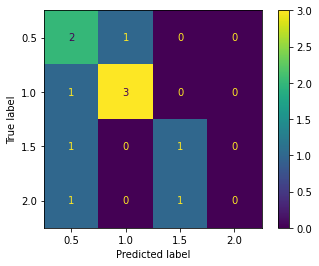

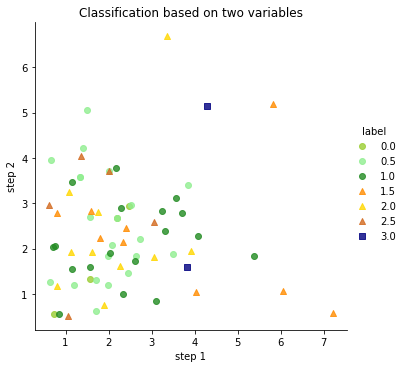

In [31]:
print("train and test model")
# label tranform
y_score = asymm_score
y_label = [int(i*2) for i in y_score]
"""using func: """
X, y = X_np, np.array(y_label)
result, best_model, best_f1, y_pred, y_test = split_train_evaluate(X, y, train_idx, test_idx)
# append 
idx = 4
X_all[idx], y_all[idx], y_pred_all[idx], y_test_all[idx] = X, y, y_pred, y_test

"""using func: """
variable_name = ['step 1', 'step 2']
scatter_label(X, y_score, variable_name)

# Attribute 6: Weight bearing (use stride time)

In [32]:
def ave_min(ls): 
    return sum(ls)/min(ls)

""" 
func: 
    get the variable track up from df 
args: 
    df: panda data 
    method: (string) how we compress the data 
    idx_single: list[string] list of data point name
return: 
    var_ls_ls: list[list[float]]
"""
import numpy as np
def reluct_variable(df_var, idx_single):
     
    # make all positive 
    df_var['stance-time'] = df_var['stance-time'].abs()
    
    # loop the data by name 
    var_ls_ls = []
    for name in idx_single:
        #print("name: ", name)
        # get col from df 
        asymm = df_var.loc[df_var['ID'] == name]['stance-time'].tolist()
        # get valid number 
        test = asymm
        #print("test: ", test)
        ls1 = [test[0], test[3], test[6], test[9]]
        ls2 = [test[1], test[4], test[7], test[10]]
        ls3 = [test[2], test[5], test[8], test[11]]
        
        """func: """
        asy1 = ave_min(ls1)
        asy2 = ave_min(ls2)
        asy3 = ave_min(ls3)
        
        # append 
        #var_ls_ls.append([ls1, ls2, ls3])
        var_ls_ls.append([asy1, asy2, asy3])
        
    return var_ls_ls

In [33]:
"""func: """
var_ls_ls = reluct_variable(df_var, idx_single)
X_np = np.array(var_ls_ls)

train and test model
a starified train/test spliting
acc, pre, rec, f1:  0.2727272727272727 0.07438016528925619 0.2727272727272727 0.11688311688311687


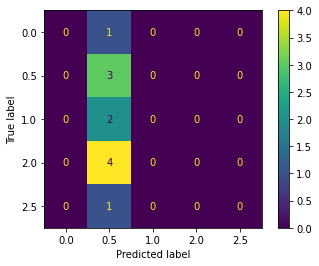

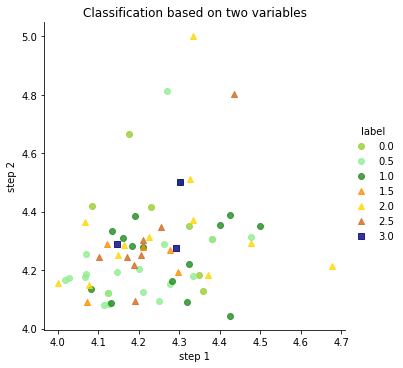

In [34]:
print("train and test model")
# label tranform
y_score = weight_score
y_label = [int(i*2) for i in y_score]
"""using func: """
X, y = X_np, np.array(y_label)
result, best_model, best_f1, y_pred, y_test = split_train_evaluate(X, y, train_idx, test_idx)
# append 
idx = 5
X_all[idx], y_all[idx], y_pred_all[idx], y_test_all[idx] = X, y, y_pred, y_test

"""using func: """
variable_name = ['step 1', 'step 2']
scatter_label(X[:, 1:], y_score, variable_name)

# Compare X_all[idx], y_all[idx], y_pred_all[idx], y_test_all[idx] 

In [36]:

X_all_np = np.concatenate((X_all[0], X_all[1], X_all[2], X_all[3], X_all[4], X_all[5]), axis=1)
X_half = np.concatenate(( X_all[1], X_all[2], X_all[4]), axis=1)
print("X_all_np: ", X_all_np.shape)
print("X_half: ", X_half.shape)

X_all_np:  (69, 14)
X_half:  (69, 7)


In [35]:
""" 
func: 
    give NRS based on 6 attributes
args: 
    ls_score: list[float] 
return: 
    NRS: float
"""
def attri_gait(ls): 
    NRS = 0
    if ls[5] >= 2.5: 
        NRS = ls[5] + 0.5
    elif max(ls[0], ls[1], ls[3]) <= 1 and max(ls[2], ls[4], ls[5]) == 0: 
        NRS = 1 
    elif max(ls[0], ls[3]) <= 2 and ls[1] <= 1 and max(ls[2], ls[4], ls[5]) <= 0.5: 
        NRS = 1.5 
    elif max(ls[0], ls[1], ls[3]) <= 2 and max(ls[2], ls[4], ls[5]) <= 1.5: 
        NRS = 2 
    elif max(ls[0], ls[1], ls[3]) <= 2.5 and max(ls[2], ls[4], ls[5]) <= 1.5: 
        NRS = 2.5 
    # final check is there is only one large score 
    elif sorted([ls[0], ls[1], ls[2], ls[3], ls[4], ls[5]])[-2] <= 2.5: 
        NRS = 2.5
    else: 
        NRS = 3
    
    return NRS

NRS = []
for i in range(len(y_all[0])): 
    ls = [y_all[0][i], y_all[1][i], y_all[2][i], y_all[3][i], y_all[4][i], y_all[5][i]]
    ls = [i/2 for i in ls]
    """func: """
    NRS.append(attri_gait(ls))
print("check: ", len(NRS))

check:  69


In [39]:
print("write out X and y: ")

pd.DataFrame(X_all_np).to_csv("X1.csv")
pd.DataFrame(X_half).to_csv("X2.csv")
pd.DataFrame(NRS).to_csv("y.csv")

write out X and y: 


In [42]:
from sklearn.model_selection import train_test_split

def evaluate_nrs(X, y):

    # init result to store performance
    result = []
    # init best model, later judge by f1
    best_model, best_f1 = 0, 0
    
    # splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

    # a list of models 
    models = [SGDClassifier(max_iter=1000, tol=1e-3), GaussianNB(), DecisionTreeClassifier(random_state=0), svm.SVC(kernel='linear')]

    """using func: wiht loo"""
    y_pred = loo_best_model(X_train, y_train, X_test, models)
    
    """using func: """
    acc, pre, rec, f1 = evaluate(y_test, y_pred)
    print("acc, pre, rec, f1: ", acc, pre, rec, f1)
    # back-transform label to score 
    test_score = [i/2 for i in y_test]
    pred_score = [i/2 for i in y_pred]
    LABEL = sorted(list(set(test_score)))
    # compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels = sorted(list(set(y_test))))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = LABEL)
    disp.plot()
    plt.show()
    
    return result, best_model, best_f1, y_pred, y_test

make prediction with all variables: 
X:  (69, 7)
a starified train/test spliting
acc, pre, rec, f1:  0.8181818181818182 0.6694214876033059 0.8181818181818182 0.7363636363636363


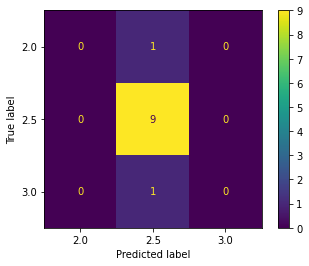

In [57]:
print("make prediction with all variables: ")

y_all_np = np.array([int(2*i) for i in NRS])
X, y = X_all_np, y_all_np
print("X: ", X.shape)
result, best_model, best_f1, y_pred, y_test = split_train_evaluate(X, y,train_idx,test_idx)

a starified train/test spliting
acc, pre, rec, f1:  0.45454545454545453 0.6439393939393939 0.45454545454545453 0.5303030303030302


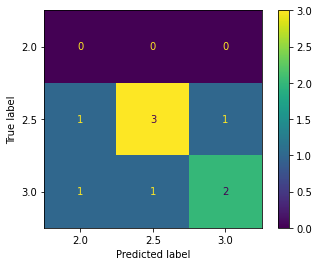

In [59]:

y_all_np = np.array([int(2*i) for i in nrs_single])
X, y = X_all_np, y_all_np
result, best_model, best_f1, y_pred, y_test = split_train_evaluate(X, y,train_idx,test_idx)

make prediction with all variables: 
acc, pre, rec, f1:  0.6666666666666666 0.6888888888888889 0.6666666666666666 0.6666666666666666


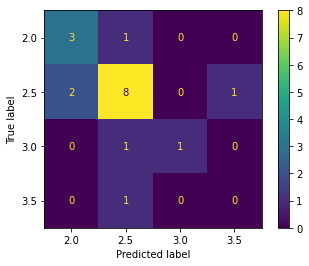

In [44]:
print("make prediction with all variables: ")

y_all_np = np.array([int(2*i) for i in NRS])
X, y = X_all_np, y_all_np
result, best_model, best_f1, y_pred, y_test = evaluate_nrs(X, y)

In [50]:
# make 1.5 to 2 for splitting
nrs_single = [i if i != 1.5 else 2 for i in nrs_single]

acc, pre, rec, f1:  0.2777777777777778 0.21666666666666667 0.2777777777777778 0.23575498575498577


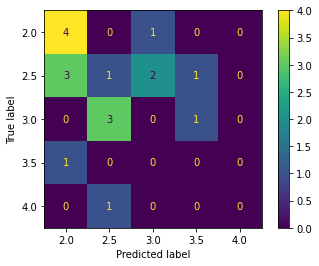

In [51]:

y_all_np = np.array([int(2*i) for i in nrs_single])
X, y = X_all_np, y_all_np
result, best_model, best_f1, y_pred, y_test = evaluate_nrs(X, y)

# Results by Gait Attribute

In [52]:


def nrs_sublist(Y):
    NRS = []
    for i in range(len(Y[0])): 
        ls = [Y[0][i], Y[1][i], Y[2][i], Y[3][i], Y[4][i], Y[5][i]]
        ls = [i/2 for i in ls]
        """func: """
        NRS.append(attri_gait(ls))
    return NRS

def plot_cm(y_pred, y_test):
    # back-transform label to score 
    test_score = [i/2 for i in y_test]
    pred_score = [i/2 for i in y_pred]
    LABEL = sorted(list(set(test_score)))
    # compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels = sorted(list(set(y_test))))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = LABEL)
    disp.plot()
    plt.show()

check:  11
check:  11


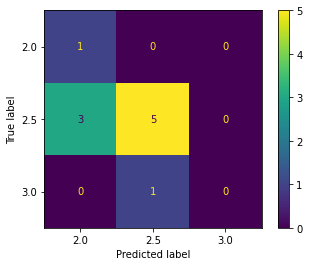

In [53]:
nrs_pred = nrs_sublist(y_pred_all)
print("check: ", len(nrs_pred))

nrs_test = nrs_sublist(y_test_all)
print("check: ", len(nrs_test))

y_pred = [int(i*2) for i in nrs_pred]
y_test = [int(i*2) for i in nrs_test]
plot_cm(y_pred, y_test)